### Tutorial 3 (Date: 13 Sep, 2019)

Link for today's notebook: https://bit.ly/2kvyvms

Today's Attendance: https://forms.gle/C4FnAdQGzsNGg6Pt9

Topics
- Tokenization (corenlp, spacy)
- Lemmatization (corenlp, spacy)
- Sentence seperation (corenlp, spacy)
- Reading corpuses
- Plotting unigram counts (defaultditc, Counter etc.)
- Zipfian distribution (http://colala.berkeley.edu/papers/piantadosi2014zipfs.pdf)




## Quick note on r' in Python

r' keyword for strings simply means that the text is considered as raw text. The escaped characters are not evaluated.


In [0]:
print('some words \n blah blah')

some words 
 blah blah


In [0]:
print(r'some words \n blah blah')

some words \n blah blah


r' considers \n as a "slash followed by an 'n' character", whereas otherwise it is treated as a newline character. 

# 1. Tokenization

Tokenization is the task of segmenting a running text into words.

Last session, we saw that applying tokenization simply based on whitespace might not be the best idea. Especially, for a langugage like Chinese.
It is said that the individual characters in Chinese are meaningful in themselves. So can we simply not just tokenize by characters?


 Let's try tokenizing characters of a Hong Kong news article. (https://www.post852.com/270084/%E4%B8%AD%E7%92%B0/)
 
 Example credits - https://medium.com/@jjsham/nlp-tokenizing-chinese-phases-3302da4336bf


In [0]:
news = "林行止表示貿易戰促使在中國的工廠搬遷到越南、寮國、印度、台灣甚至是馬來西亞"
print(news)   #a news article ()


林行止表示貿易戰促使在中國的工廠搬遷到越南、寮國、印度、台灣甚至是馬來西亞


Google Translate translates the article as follows:

"Lin Xingzhi said that the trade war prompted the relocation of factories in China to Vietnam, Laos, India, Taiwan and even Malaysia."

This is how you can split a string into characters

In [0]:
print(list('this is a string.'))

['t', 'h', 'i', 's', ' ', 'i', 's', ' ', 'a', ' ', 's', 't', 'r', 'i', 'n', 'g', '.']


Let's try this on our news string

In [0]:
print(list(news))

['林', '行', '止', '表', '示', '貿', '易', '戰', '促', '使', '在', '中', '國', '的', '工', '廠', '搬', '遷', '到', '越', '南', '、', '寮', '國', '、', '印', '度', '、', '台', '灣', '甚', '至', '是', '馬', '來', '西', '亞']


#### Why does this not work?

Some good reasons are as follows:

#### 1. Names

'林行止' is a name (Lin Xingzhi)

However, splitting it into characters literally mean - "forest, walk, halt"

#### 2. Some phrases are made up of two of more characters.

 - 馬來西亞 means Malaysia, but word by word means “Horse come to Western Asia”


So what should we do?

Luckily for us, people have made packages available to the public which are modeled independently for different languages. 

Hence, we can simply just import those into Python and use them as we wish.


I'll cover two of the most popular state-of-the-art packages which are used by researchers working on Natural Language Processing.

- StanfordCoreNLP (https://stanfordnlp.github.io/stanfordnlp/)
- spacy (https://spacy.io/)

Note: Both stanfordcorenlp and spacy support computations on a GPU

## 1.1 StanfordCoreNLP

In [0]:
!pip install stanfordnlp
import stanfordnlp   

## If the above command doesn't work, run the following before it:
## !pip install stanfordnlp

     |████████████████████████████████| 163kB 3.5MB/s 


#### Downloading Models

In [0]:
# Download an English model
stanfordnlp.download('en', force=True)
  
# Similarly, download a (traditional) Chinese model
stanfordnlp.download('zh', force=True)

Using the default treebank "en_ewt" for language "en".
Would you like to download the models for: en_ewt now? (Y/n)

Default download directory: /root/stanfordnlp_resources
Hit enter to continue or type an alternate directory.

Download location: /root/stanfordnlp_resources/en_ewt_models.zip


100%|██████████| 235M/235M [00:10<00:00, 18.8MB/s]



Download complete.  Models saved to: /root/stanfordnlp_resources/en_ewt_models.zip
Extracting models file for: en_ewt
Cleaning up...Done.
Using the default treebank "zh_gsd" for language "zh".
Would you like to download the models for: zh_gsd now? (Y/n)

Default download directory: /root/stanfordnlp_resources
Hit enter to continue or type an alternate directory.

Download location: /root/stanfordnlp_resources/zh_gsd_models.zip


100%|██████████| 234M/234M [00:30<00:00, 7.46MB/s]



Download complete.  Models saved to: /root/stanfordnlp_resources/zh_gsd_models.zip
Extracting models file for: zh_gsd
Cleaning up...Done.


#### Processing Text - setting up a pipeline in corenlp
 (Source: https://bit.ly/2kb8eJU)

 - To process a piece of text, you'll need to first construct a `Pipeline` with different `Processor` units. The pipeline is language-specific, so again you'll need to first specify the language.

 - By default, the pipeline will include all processors, including tokenization, multi-word token expansion, part-of-speech tagging, lemmatization and dependency parsing. However, you can always specify what processors you want to include with the processors argument.

 - Note that the backend device has to be specified when building the pipeline. By default, the pipeline will always use a CUDA-compatible GPU if it exists on your device to accelerate computing, and it'll fall back to CPU if no such GPU can be found. You can force the pipeline to use CPU regardless by setting use_gpu=False.

In [0]:
# Build an English pipeline, with all processors by default
corenlp_en_nlp = stanfordnlp.Pipeline(lang='en', processors = 'tokenize', use_gpu=False)

# Build a Chinese pipeline, with customized processor list, and force it to use CPU
corenlp_zh_nlp = stanfordnlp.Pipeline(lang='zh', processors='tokenize', use_gpu=False)

### A full processors list looks like: processors='tokenize,lemma,pos,depparse'

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Done loading processors!
---
Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/root/stanfordnlp_resources/zh_gsd_models/zh_gsd_tokenizer.pt', 'lang': 'zh', 'shorthand': 'zh_gsd', 'mode': 'predict'}
Done loading processors!
---


#### Creating document objects

In [0]:
en_str = "Homelessness is to be found in the large numbers of mentally ill and substance-abusing people in the homeless population, don't you think?"
zh_str = "林行止表示貿易戰促使在中國的工廠搬遷到越南、寮國、印度、台灣甚至是馬來西亞"

In [0]:
## Our Earlier algo using regex function
import re
print(re.findall('[^ ]+', en_str))  ## based on whitespace seperation

['Homelessness', 'is', 'to', 'be', 'found', 'in', 'the', 'large', 'numbers', 'of', 'mentally', 'ill', 'and', 'substance-abusing', 'people', 'in', 'the', 'homeless', 'population,', "don't", 'you', 'think?']


In [0]:
# Processing English text
en_doc = corenlp_en_nlp(en_str)
print(type(en_doc))

# Processing Chinese text
zh_doc = corenlp_zh_nlp(zh_str)
print(type(zh_doc))

<class 'stanfordnlp.pipeline.doc.Document'>
<class 'stanfordnlp.pipeline.doc.Document'>


In [0]:
for sent in en_doc.sentences:
    corenlp_en_sent = [word.text for word in sent.words]
    print(corenlp_en_sent)

['Homelessness', 'is', 'to', 'be', 'found', 'in', 'the', 'large', 'numbers', 'of', 'mentally', 'ill', 'and', 'substance', '-', 'abusing', 'people', 'in', 'the', 'homeless', 'population', ',', 'do', "n't", 'you', 'think', '?']


In [0]:
for i, sent in enumerate(zh_doc.sentences):
    corenlp_zh_sent = [word.text for word in sent.words]
    print(corenlp_zh_sent)

['林', '行止', '表示', '貿易', '戰促', '使', '在', '中國', '的', '工廠', '搬遷', '到', '越南', '、', '寮國', '、', '印度', '、', '台灣', '甚至', '是', '馬來西亞']


## 1.2 Spacy

In [0]:
import spacy

In [0]:
## Download models:
!python -m spacy download en_core_web_sm
!python -m spacy download it_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 11.1MB 1.2MB/s 
  Created wheel for it-core-news-sm: filename=it_core_news_sm-2.1.0-cp36-none-any.whl size=11123297 sha256=2728888c0f22681d48a2b6ed904eac638ad3acfe7bf9fd091c9e2b89f094487c
  Stored in directory: /tmp/pip-ephem-wheel-cache-uyo_tid2/wheels/8a/7b/11/1010c25163c5166f22f68205123898a33cbe535e0f7525a9ab
Successfully built it-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('it_core_news_sm')


 Loading spacy models (A list of models is available here - https://spacy.io/usage/models)

In [0]:
spacy_en_nlp = spacy.load("en_core_web_sm" ) #disable=["tagger", "parser", "ner"]

Unfortunately, Spacy doesn't have a model for Chinese, but they do support Chinese tokenization using another package `jieba`

In [0]:
spacy_en_nlp.pipeline

[('tagger', <spacy.pipeline.pipes.Tagger at 0x7f0e318eeb00>),
 ('parser', <spacy.pipeline.pipes.DependencyParser at 0x7f0e312bd888>),
 ('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x7f0e312bd8e8>)]

#### Creating document objects

In [0]:
en_str = "Homelessness is to be found in the large numbers of mentally ill and substance-abusing people in the homeless population, does he not think so?"
zh_str = "林行止表示貿易戰促使在中國的工廠搬遷到越南、寮國、印度、台灣甚至是馬來西亞"

In [0]:
en_doc = spacy_en_nlp(en_str)
spacy_en_sent = [w.text for w in en_doc]
print(spacy_en_sent)

['Homelessness', 'is', 'to', 'be', 'found', 'in', 'the', 'large', 'numbers', 'of', 'mentally', 'ill', 'and', 'substance', '-', 'abusing', 'people', 'in', 'the', 'homeless', 'population', ',', 'does', 'he', 'not', 'think', 'so', '?']


In [0]:
spacy_en_sent = [w.text for w in en_doc]
print(spacy_en_sent)

['Homelessness', 'is', 'to', 'be', 'found', 'in', 'the', 'large', 'numbers', 'of', 'mentally', 'ill', 'and', 'substance', '-', 'abusing', 'people', 'in', 'the', 'homeless', 'population', ',', 'does', 'he', 'not', 'think', 'so', '?']


Tokenization for Chinese

In [0]:
from spacy.lang.zh import Chinese

zh_nlp = Chinese()
zh_doc = zh_nlp(zh_str)

spacy_zh_sent = [w.text for w in zh_doc]
print(spacy_zh_sent)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.897 seconds.
Prefix dict has been built succesfully.


['林', '行止', '表示', '貿易戰', '促使', '在', '中國', '的', '工廠', '搬', '遷', '到', '越南', '、', '寮', '國', '、', '印度', '、', '台灣', '甚至', '是', '馬', '來', '西亞']


Note how spacy wasn't able to correctly tokenize Malaysia (the last three words), however, Corenlp did correctly tokenize it.

In [0]:
print(corenlp_en_sent)
print(spacy_en_sent)

['Homelessness', 'is', 'to', 'be', 'found', 'in', 'the', 'large', 'numbers', 'of', 'mentally', 'ill', 'and', 'substance', '-', 'abusing', 'people', 'in', 'the', 'homeless', 'population', ',', 'do', "n't", 'you', 'think', '?']
['Homelessness', 'is', 'to', 'be', 'found', 'in', 'the', 'large', 'numbers', 'of', 'mentally', 'ill', 'and', 'substance', '-', 'abusing', 'people', 'in', 'the', 'homeless', 'population', ',', 'does', 'he', 'not', 'think', 'so', '?']


# 2. Lemmatization

Jurafsky and Martin define Lemmatization in their book as follows (https://web.stanford.edu/~jurafsky/slp3/2.pdf):

"Lemmatization is the task of determining that two words have the same root,
despite their surface differences. The words am, are, and is have the shared lemma
be; the words dinner and dinners both have the lemma dinner. Lemmatizing each of
these forms to the same lemma will let us find all mentions of words in Russian like
Moscow. 

The lemmatized form of a sentence like:

"He is reading detective stories"

would thus be:

He be read detective story."

To get the lemmatized forms of words, we need to modify the processors list in the corenlp object

In [0]:
# Build an English pipeline, with all processors by default
corenlp_en_nlp = stanfordnlp.Pipeline(lang='en', processors = 'tokenize,lemma', use_gpu=False)

# Build a Chinese pipeline, with customized processor list, and force it to use CPU
corenlp_zh_nlp = stanfordnlp.Pipeline(lang='zh', processors='tokenize,lemma', use_gpu=False)

### A full processors list looks like: processors='tokenize,lemma,pos,depparse'

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
Done loading processors!
---
Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/root/stanfordnlp_resources/zh_gsd_models/zh_gsd_tokenizer.pt', 'lang': 'zh', 'shorthand': 'zh_gsd', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/root/stanfordnlp_resources/zh_gsd_models/zh_gsd_lemmatizer.pt', 'lang': 'zh', 'shorthand': 'zh_gsd', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft 

In [0]:
# Processing English text
en_doc = corenlp_en_nlp(en_str)
print(type(en_doc))

# Processing Chinese text
zh_doc = corenlp_zh_nlp(zh_str)
print(type(zh_doc))

<class 'stanfordnlp.pipeline.doc.Document'>
<class 'stanfordnlp.pipeline.doc.Document'>


In [0]:
for sent in en_doc.sentences:
    corenlp_en_sent = [(word.text, word.lemma) for word in sent.words]
    print(corenlp_en_sent)

[('Homelessness', 'homelessness'), ('is', 'be'), ('to', 'to'), ('be', 'be'), ('found', 'find'), ('in', 'in'), ('the', 'the'), ('large', 'large'), ('numbers', 'number'), ('of', 'of'), ('mentally', 'mentally'), ('ill', 'ill'), ('and', 'and'), ('substance', 'substance'), ('-', '-'), ('abusing', 'abuse'), ('people', 'people'), ('in', 'in'), ('the', 'the'), ('homeless', 'homeless'), ('population', 'population'), (',', ','), ('does', 'do'), ('he', 'he'), ('not', 'not'), ('think', 'think'), ('so', 'so'), ('?', '?')]


In [0]:
for i, sent in enumerate(zh_doc.sentences):
    corenlp_zh_sent = [(word.text, word.lemma) for word in sent.words]
    print(corenlp_zh_sent)

[('林', '林'), ('行止', '行止'), ('表示', '表示'), ('貿易', '貿易'), ('戰促', '戰促'), ('使', '使'), ('在', '在'), ('中國', '中國'), ('的', '的'), ('工廠', '工廠'), ('搬遷', '搬遷'), ('到', '到'), ('越南', '越南'), ('、', '、'), ('寮國', '寮國'), ('、', '、'), ('印度', '印度'), ('、', '、'), ('台灣', '台灣'), ('甚至', '甚至'), ('是', '是'), ('馬來西亞', '馬來西亞')]


#### Spacy

In [0]:
en_str = "I don't like him."
en_doc = spacy_en_nlp(en_str)
spacy_en_sent = [(w.text, w.lemma_) for w in en_doc]
print(spacy_en_sent)

[('I', '-PRON-'), ('do', 'do'), ("n't", 'not'), ('like', 'like'), ('him', '-PRON-'), ('.', '.')]


# 3. Named Entity Recognition

In Tutorial 2, we discussed an exercise where we were trying to figure out how to extract all the named entities in a text. One simple way of doing that was to use a regex function to match all the words starting with a capital letter. But then it doesn't work because every sentence also starts a with a capital letter word and it might not be a named entity. Also, for identifying names, we want to consider something like "Harry Potter" as the same entity instead of saying that "Harry" is one entity and "Potter" is another.

We can use the spacy package to extract entities from a text string as follows:

In [0]:
en_str = '''
This is an example string. Harry Potter is a name of an individual. Ron Weasley and Draco Malfoy are his school-mates.
Voldemort is another individual who has an army of Death Eaters.
He belongs to the Hogwart school. Nobody actually know if the school actually exists. But, nevertheless, people love the concept.
Do you think the NER-System, Spacy, will capture all the named entities in this string correctly?
'''

en_doc = spacy_en_nlp(en_str)
en_doc.ents

(Harry Potter,
 Ron Weasley,
 Draco Malfoy,
 Voldemort,
 Death Eaters,
 Hogwart,
 the NER-System,
 Spacy)

As we can see above, the NER system is pretty good at finding the named entities in a text

# 4. Sentence Separators

Sentence separation is also an important task in NLP. 

One can usually look at cues such as periods, question marks, exclamation points etc.  

#### Corenlp

In [0]:
# Processing English text
en_doc = corenlp_en_nlp("The N.E.R. system is pretty good. I don't believe it.")

for i, sent in enumerate(en_doc.sentences):
    print("[Sentence {}]".format(i+1))
    for word in sent.words:
        print("{:12s}\t{:12s}".format(word.text, word.lemma))
    print("")

[Sentence 1]
The         	the         
N.E.R.      	N.E.R.      
system      	system      
is          	be          
pretty      	pretty      
good        	good        
.           	.           

[Sentence 2]
I           	I           
do          	do          
n't         	not         
believe     	believe     
it          	it          
.           	.           



#### Spacy

In [0]:
raw_text = "Barack Obama was born in Hawaii.  He was elected president in 2008."
doc = spacy_en_nlp(raw_text)
sentences = [sent.string.strip() for sent in doc.sents]
print(sentences)

['Barack Obama was born in Hawaii.', 'He was elected president in 2008.']


# 5. Reading Corpora

NLTK is another popular NLP processing library but it is outdated and it is best not use the tokenization, lemmatization etc. functions from it. But we can import some corpora from it to do some text processing.

In [0]:
import nltk

In [0]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [0]:
from nltk.corpus import brown ## Importing brown corpus

In [0]:
print("Total number of words in the Brown corpus: {:,}".format(len(brown.words())))

Total number of words in the Brown corpus: 1,161,192


Let's count the frequency of each word in the corpus

In [0]:
from collections import defaultdict, Counter

In [0]:
count_dct = defaultdict(int)

for word in brown.words():
  count_dct[word]= count_dct[word]+ 1
  
print("Vocabulary size of Brown corpus: {:,}".format(len(count_dct)))

Vocabulary size of Brown corpus: 56,057


In [0]:
k_object = Counter(count_dct)
type(k_object)

collections.Counter

Finding the most frequent n words in the corpus 

In [0]:
k_object.most_common(15)

[('the', 62713),
 (',', 58334),
 ('.', 49346),
 ('of', 36080),
 ('and', 27915),
 ('to', 25732),
 ('a', 21881),
 ('in', 19536),
 ('that', 10237),
 ('is', 10011),
 ('was', 9777),
 ('for', 8841),
 ('``', 8837),
 ("''", 8789),
 ('The', 7258)]

#### A quick note on enumeration function in Python

In [0]:
lst = ['a', 'b', 'c']
for item in enumerate(lst):
  print(item)

(0, 'a')
(1, 'b')
(2, 'c')


In [0]:
lst = ['a', 'b', 'c']

for idx, item in enumerate(lst):
  print("Index:{}, Item: {}".format(idx, item))

Index:0, Item: a
Index:1, Item: b
Index:2, Item: c


# 6. Plotting unigrams (Zipfian distribution)

A fun video on Ziphy mystery: https://www.youtube.com/watch?v=fCn8zs912OE&t=90s

#### 1. Brown Corpus

"The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University. This corpus contains text from 500 sources, and the sources have been categorized by genre, such as news, editorial, and so on. 1.1 gives an example of each genre."  Ref: https://www.nltk.org/book/ch02.html

#### Store ranks and frequency of words:

In [0]:
count_dct = defaultdict(int)

for word in brown.words():
  count_dct[word]+=1
  
print("Total number of words in the Brown corpus {:,}".format(len(brown.words())))
print("Vocabulary size of Brown corpus: {:,}".format(len(count_dct)))

k = Counter(count_dct)

Total number of words in the Brown corpus 1,161,192
Vocabulary size of Brown corpus: 56,057


In [0]:
x_axis = []
y_axis = []
words = []

import math

for idx, (word, freq) in enumerate(k.most_common()):
  x_axis.append(math.log(idx+1))
  y_axis.append(math.log(freq))
  words.append(word)

In [0]:
k.most_common(10)

[('the', 62713),
 (',', 58334),
 ('.', 49346),
 ('of', 36080),
 ('and', 27915),
 ('to', 25732),
 ('a', 21881),
 ('in', 19536),
 ('that', 10237),
 ('is', 10011)]

In [0]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Frequency Vs. Rank Distribution (Brown)')

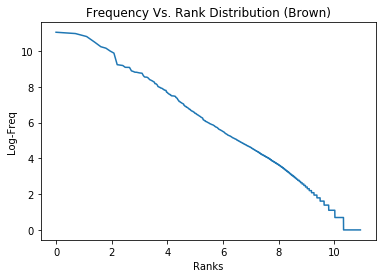

In [0]:
plt.plot(x_axis, y_axis)
plt.xlabel("Ranks")
plt.ylabel("Log-Freq")
plt.title("Frequency Vs. Rank Distribution (Brown)")

#### Exercise:
1. Create a function to plot rank vs frequency distribution for any corpus.
2. Download any book from https://www.gutenberg.org/ and plot its frequency distribution


In [0]:
def plot_freq_rank(corpus_words):
  '''
  Input: corpus_words: a list of all the words in the corpus
  
  
  Output: Rank vs Frequency Plot
  '''
  
  count_dct = defaultdict(int)

  for word in corpus_words:
    count_dct[word]+=1

  print("# Words: {:,}, Vocab size: {:,}".format(len(corpus_words),len(count_dct)))
  
  k = Counter(count_dct)
  
  ## Plotting stuff
  x_axis = []
  y_axis = []
  words = []

  import math
  import matplotlib.pyplot as plt

  for idx, (word, freq) in enumerate(k.most_common()):
    x_axis.append(math.log(idx+1))  ## idx+1 because idx starts at 0 and log(0) is undefined
    y_axis.append(math.log(freq))
    words.append(word)
  
  plt.plot(x_axis, y_axis)
  plt.xlabel("Ranks")
  plt.ylabel("Log-Freq")
  plt.title("Frequency Vs. Rank Distribution")

#### Plot unigram graphs for different corpura

In [0]:
nltk.download('gutenberg')
nltk.download('reuters')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...


True

In [0]:
reuters_words =  nltk.corpus.reuters.words()
shakesp_words =  nltk.corpus.gutenberg.words('shakespeare-caesar.txt')

# Words: 1,720,901, Vocab size: 41,600


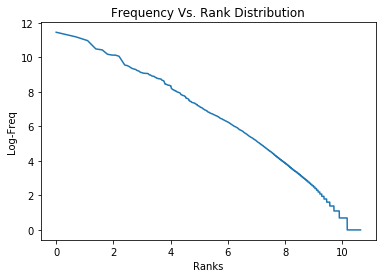

In [0]:
plot_freq_rank(reuters_words)

# Words: 25,833, Vocab size: 3,560


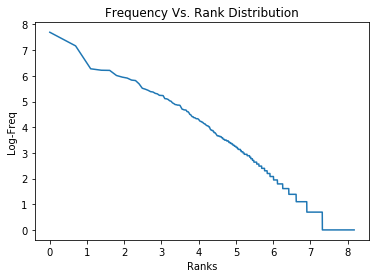

In [0]:
plot_freq_rank(shakesp_words)

## Downloading a Book from Gutenberg (https://www.gutenberg.org)

In [0]:
!pip install wget
import wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=35827d48563245a502b4c2236284fd4f498c25f4d285e1fa9f25f058fb777666
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
wget.download("https://www.gutenberg.org/files/834/834-0.txt", 'sherlock.txt')

'sherlock.txt'

In [0]:
with open('sherlock.txt', 'r') as f:
  sherlock_text = f.read()

In [0]:
sherlock_text[:100]

'\nProject Gutenberg’s The Memoirs of Sherlock Holmes, by Arthur Conan Doyle\n\nThis eBook is for the us'

In [0]:
sherlock_doc = corenlp_en_nlp(sherlock_text)

In [0]:
print("Total number of sentences: {}".format(len(sherlock_doc.sentences)))

sherlock_words = [word.text for sent in sherlock_doc.sentences for word in sent.words]

Total number of sentences: 6068


# Words: 118,625, Vocab size: 8,567


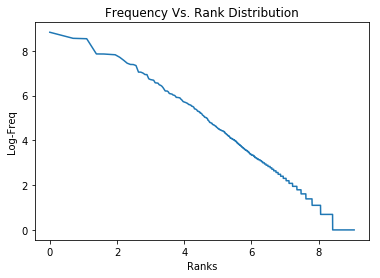

In [0]:
plot_freq_rank(sherlock_words)

## Testing ziphy's law in a Randomly generated corpus

In [0]:
import random
random.choice("abcdefg ")

'g'

In [0]:
random_corpus = ""
for i in range(1000000):
  random_corpus+= random.choice("abcdefg ")

In [0]:
random_corpus_words = random_corpus.split()
print(random_corpus_words[:10])

['ffeeegcf', 'abbbccgccadffe', 'dffgfca', 'ecaafcea', 'gg', 'cefdebcge', 'dfdf', 'gbeffd', 'aadccaagfeg', 'dcagedg']


# Words: 109,686, Vocab size: 65,097


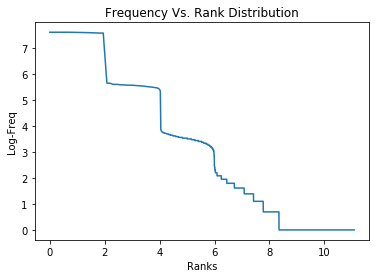

In [0]:
plot_freq_rank(random_corpus_words)

It looks like Zipfian distribution doesn't work for randomly generated text

## Next Class:
 Topics
- Google ngram viewer
- Constituency and Dependency Parsers
- Tree searching